# Scipy简介

**`Ipython`** 提供了一个很好的解释器界面。

**`Matplotlib`** 提供了一个类似 **`Matlab`** 的画图工具。

**`Numpy`** 提供了 `ndarray` 对象，可以进行快速的向量化计算。

**`Scipy`** 是 **`Python`** 中进行科学计算的一个第三方库，以 **`Numpy`** 为基础。

**`Pandas`** 是处理时间序列数据的第三方库，提供一个类似 **`R`** 语言的环境。

**`StatsModels`** 是一个统计库，着重于统计模型。

**`Scikits`** 以 **`Scipy`** 为基础，提供如 **`scikits-learn` 机器学习**和**`scikits-image` 图像处理**等高级用法。

**`Scipy`** 由不同科学计算领域的子模块组成：

子模块|描述
----|----
`cluster`|  聚类算法
`constants`| 物理数学常数
`fftpack`| 快速傅里叶变换
`integrate`| 积分和常微分方程求解
`interpolate`| 插值
`io`| 输入输出
`linalg`| 线性代数
`odr`| 正交距离回归
`optimize`| 优化和求根
`signal`| 信号处理
`sparse`| 稀疏矩阵
`spatial`| 空间数据结构和算法
`special`| 特殊方程
`stats`| 统计分布和函数
`weave`| C/C++ 积分

在使用 **`Scipy`** 之前，为了方便，假定这些基础的模块已经被导入：

In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt

使用 **Scipy** 中的子模块时，需要分别导入：

In [2]:
from  scipy import linalg, optimize

对于一些常用的函数，这些在子模块中的函数可以在 `scipy` 命名空间中调用。另一方面，由于 **`Scipy`** 以 **`Numpy`** 为基础，因此很多基础的 **`Numpy`** 函数可以在`scipy` 命名空间中直接调用。

我们可以使用 `numpy` 中的 `info` 函数来查看函数的文档：

In [3]:
# np.info(optimize.fmin)

可以用 `lookfor` 来查询特定关键词相关的函数：

In [4]:
# np.lookfor("resize array")

还可以指定查找的模块：

In [5]:
np.lookfor("remove path", module="os")

Search results for 'remove path'
--------------------------------
os.removedirs
    removedirs(name)
os.walk
    Directory tree generator.


In [6]:
# np.lookfor('groupby',module='pandas')

# 概率统计方法

## 简介

In [31]:
np.set_printoptions(precision=4)

**`Python`** 中常用的统计工具有 **`Numpy, Pandas, PyMC, StatsModels`** 等。

**`Scipy`** 中的子库 `scipy.stats` 中包含很多统计上的方法。

In [32]:
heights = array([1.46, 1.79, 2.01, 1.75, 1.56, 1.69, 1.88, 1.76, 1.88, 1.78])

`Numpy` 自带简单的统计方法：

In [33]:
print ('mean, ', heights.mean())
print( 'min, ', heights.min())
print ('max, ', heights.max())
print ('standard deviation, ', heights.std())

mean,  1.7559999999999998
min,  1.46
max,  2.01
standard deviation,  0.15081114017207078


导入 **`Scipy`** 的统计模块：

In [34]:
import scipy.stats.stats as st

其他统计量：

In [37]:
print ('mode, ', st.mode(heights) )          # 众数及其出现次数
print ('skewness, ', st.skew(heights) )      # 偏度
print ('kurtosis, ', st.kurtosis(heights) )  # 峰度
print ('and so many more...')

mode,  ModeResult(mode=array([1.88]), count=array([2]))
skewness,  -0.3935244564726347
kurtosis,  -0.33067209772439865
and so many more...


## 概率分布

常见的连续概率分布有：

- 均匀分布
- 正态分布
- `t`分布
- `F`分布
- `Gamma`分布
- ...

离散概率分布：

- 伯努利分布
- 几何分布
- ...

这些都可以在 `scipy.stats` 中找到。

## 连续分布

### 正态分布

以正态分布为例，先导入正态分布：

In [38]:
from scipy.stats import norm

它包含四类常用的函数：

- `norm.cdf` 返回对应的累计分布函数;
- `norm.pdf` 返回对应的概率密度函数值;
- `norm.rvs` 产生指定参数的随机变量;
- `norm.fit` 返回给定数据下，各参数的最大似然估计（MLE）值

从正态分布产生500个随机点：

In [40]:
x_norm = norm.rvs(size=500)
type(x_norm)

numpy.ndarray

直方图：

counts,  [  6.  26.  59.  84. 107. 103.  69.  35.   9.   2.]
bin centers [-2.763  -2.1855 -1.608  -1.0306 -0.4531  0.1244  0.7019  1.2794  1.8569
  2.4344  3.0119]


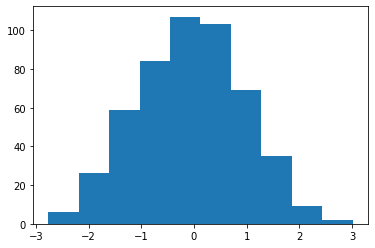

In [41]:
h = hist(x_norm)
print ('counts, ', h[0])
print ('bin centers', h[1])

归一化直方图（用出现频率代替次数），将划分区间变为 `20`（默认 `10`）：

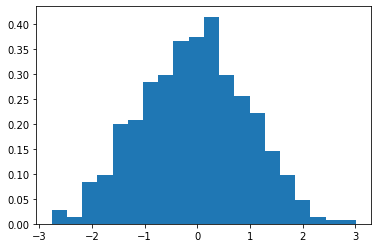

In [44]:
h = hist(x_norm, density=True, bins=20)

在这组数据下，正态分布参数的最大似然估计值为：

In [45]:
x_mean, x_std = norm.fit(x_norm)

print ('mean, ', x_mean)
print ('x_std, ', x_std)

mean,  -0.06668261405243779
x_std,  0.9978989147070589


将真实的概率密度函数与直方图进行比较：

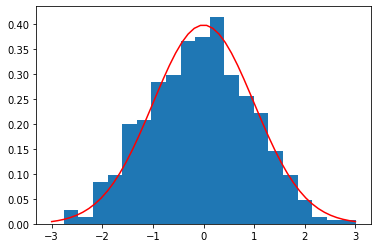

In [49]:
h = hist(x_norm, density=True, bins=20)

x = linspace(-3,3,50)
p = plot(x, norm.pdf(x), 'r-')

导入积分函数：

In [50]:
from scipy.integrate import trapz 

通过积分，计算落在某个区间的概率大小：

95.45% of the values lie between -2 and 2


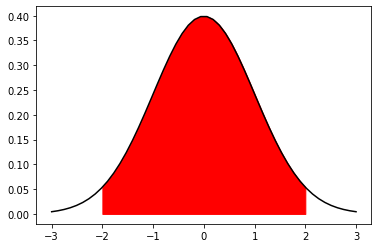

In [52]:
x1 = linspace(-2,2,108)
p = trapz(norm.pdf(x1), x1) 
print ('{:.2%} of the values lie between -2 and 2'.format(p))

fill_between(x1, norm.pdf(x1), color = 'red')
plot(x, norm.pdf(x), 'k-')

默认情况，正态分布的参数为均值0，标准差1，即标准正态分布。

可以通过 `loc` 和 `scale` 来调整这些参数，一种方法是调用相关函数时进行输入：

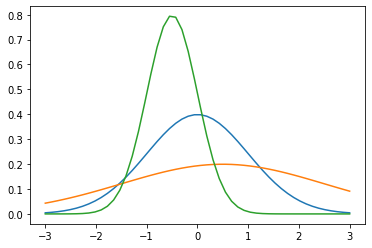

In [53]:
p = plot(x, norm.pdf(x, loc=0, scale=1))
p = plot(x, norm.pdf(x, loc=0.5, scale=2))
p = plot(x, norm.pdf(x, loc=-0.5, scale=.5))

另一种则是将 `loc, scale` 作为参数直接输给 `norm` 生成相应的分布：

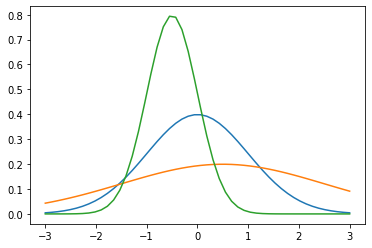

In [54]:
p = plot(x, norm(loc=0, scale=1).pdf(x))
p = plot(x, norm(loc=0.5, scale=2).pdf(x))
p = plot(x, norm(loc=-0.5, scale=.5).pdf(x))

### 其他连续分布

In [55]:
from scipy.stats import lognorm, t, dweibull

支持与 `norm` 类似的操作，如概率密度函数等。

不同参数的对数正态分布：

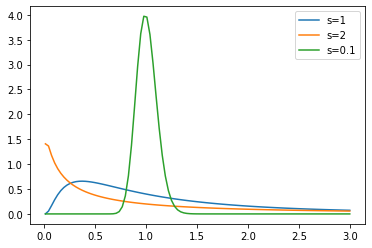

In [56]:
x = linspace(0.01, 3, 100)

plot(x, lognorm.pdf(x, 1), label='s=1')
plot(x, lognorm.pdf(x, 2), label='s=2')
plot(x, lognorm.pdf(x, .1), label='s=0.1')

legend()

不同的韦氏分布：

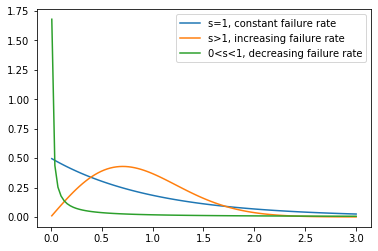

In [57]:
x = linspace(0.01, 3, 100)

plot(x, dweibull.pdf(x, 1), label='s=1, constant failure rate')
plot(x, dweibull.pdf(x, 2), label='s>1, increasing failure rate')
plot(x, dweibull.pdf(x, .1), label='0<s<1, decreasing failure rate')

legend()

不同自由度的 `t` 分布：

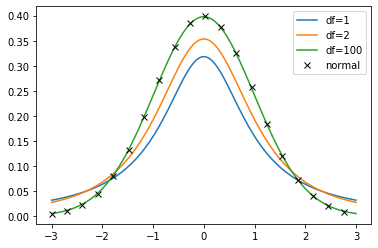

In [58]:
x = linspace(-3, 3, 100)

plot(x, t.pdf(x, 1), label='df=1')
plot(x, t.pdf(x, 2), label='df=2')
plot(x, t.pdf(x, 100), label='df=100')
plot(x[::5], norm.pdf(x[::5]), 'kx', label='normal')

legend()

## 离散分布

导入离散分布：

In [59]:
from scipy.stats import binom, poisson, randint

离散分布没有概率密度函数，但是有概率质量函数。

离散均匀分布的概率质量函数（PMF）：

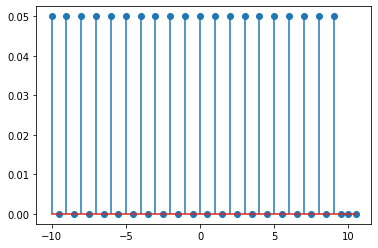

In [61]:
high = 10
low = -10

x = arange(low, high+1, 0.5)
p = stem(x, randint(low, high).pmf(x),use_line_collection=True)  # 杆状图

二项分布：

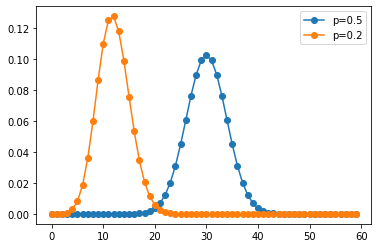

In [62]:
num_trials = 60
x = arange(num_trials)

plot(x, binom(num_trials, 0.5).pmf(x), 'o-', label='p=0.5')
plot(x, binom(num_trials, 0.2).pmf(x), 'o-', label='p=0.2')

legend()

泊松分布：

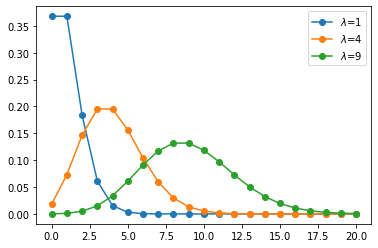

In [63]:
x = arange(0,21)

plot(x, poisson(1).pmf(x), 'o-', label=r'$\lambda$=1')
plot(x, poisson(4).pmf(x), 'o-', label=r'$\lambda$=4')
plot(x, poisson(9).pmf(x), 'o-', label=r'$\lambda$=9')

legend()

## 自定义离散分布

导入要用的函数：

In [64]:
from scipy.stats import rv_discrete

一个不均匀的骰子对应的离散值及其概率：

In [65]:
xk = [1, 2, 3, 4, 5, 6]
pk = [.3, .35, .25, .05, .025, .025]

定义离散分布：

In [66]:
loaded = rv_discrete(values=(xk, pk))

此时， `loaded` 可以当作一个离散分布的模块来使用。

产生两个服从该分布的随机变量：

In [67]:
loaded.rvs(size=2)

array([3, 1])

产生100个随机变量，将直方图与概率质量函数进行比较：

<StemContainer object of 3 artists>

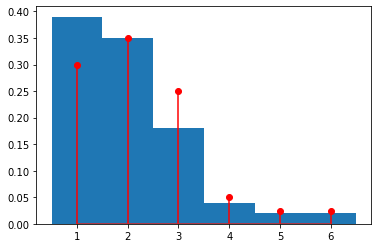

In [70]:
samples = loaded.rvs(size=100)
bins = linspace(.5,6.5,7)

hist(samples, bins=bins, density=True)
stem(xk, loaded.pmf(xk), markerfmt='ro', linefmt='r-',use_line_collection=True)

## 假设检验

导入相关的函数：

- 正态分布
- 独立双样本 `t` 检验，配对样本 `t` 检验，单样本 `t` 检验
- `t` 分布

`t` 检验的相关内容请参考：
- 百度百科-`t` 检验：http://baike.baidu.com/view/557340.htm
- 维基百科-学生 `t` 检验：https://en.wikipedia.org/wiki/Student%27s_t-test

In [71]:
from scipy.stats import norm
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp
from scipy.stats import t

### 独立样本 t 检验

两组参数不同的正态分布：

In [72]:
n1 = norm(loc=0.3, scale=1.0)
n2 = norm(loc=0, scale=1.0)

从分布中产生两组随机样本：

In [73]:
n1_samples = n1.rvs(size=100)
n2_samples = n2.rvs(size=100)

将两组样本混合在一起：

In [74]:
samples = hstack((n1_samples, n2_samples)) 

最大似然参数估计：

In [75]:
loc, scale = norm.fit(samples)
n = norm(loc=loc, scale=scale)

比较：

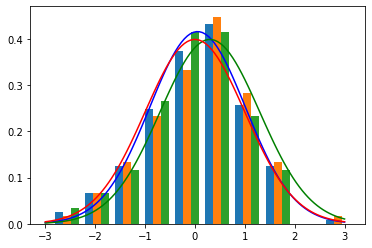

In [77]:
x = linspace(-3,3,100)

hist([samples, n1_samples, n2_samples], density=True)
plot(x, n.pdf(x), 'b-')
plot(x, n1.pdf(x), 'g-')
plot(x, n2.pdf(x), 'r-')

独立双样本 `t` 检验的目的在于判断两组样本之间是否有显著差异：

In [78]:
t_val, p = ttest_ind(n1_samples, n2_samples)

print ('t = {}'.format(t_val))
print ('p-value = {}'.format(p))

t = 0.8447654649518327
p-value = 0.3992613815984767


`p` 值小，说明这两个样本有显著性差异。

### 配对样本 t 检验

配对样本指的是两组样本之间的元素一一对应，例如，假设我们有一组病人的数据：

In [79]:
pop_size = 35

pre_treat = norm(loc=0, scale=1)
n0 = pre_treat.rvs(size=pop_size)

经过某种治疗后，对这组病人得到一组新的数据：

In [80]:
effect = norm(loc=0.05, scale=0.2)
eff = effect.rvs(size=pop_size)

n1 = n0 + eff

新数据的最大似然估计：

In [81]:
loc, scale = norm.fit(n1)
post_treat = norm(loc=loc, scale=scale)

画图：

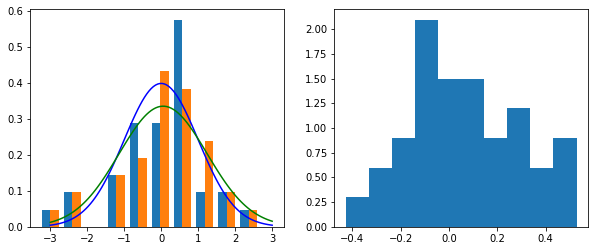

In [83]:
fig = figure(figsize=(10,4))

ax1 = fig.add_subplot(1,2,1)
h = ax1.hist([n0, n1], density=True)
p = ax1.plot(x, pre_treat.pdf(x), 'b-')
p = ax1.plot(x, post_treat.pdf(x), 'g-')

ax2 = fig.add_subplot(1,2,2)
h = ax2.hist(eff, density=True)

独立 `t` 检验：

In [84]:
t_val, p = ttest_ind(n0, n1)

print ('t = {}'.format(t_val))
print( 'p-value = {}'.format(p))

t = -0.2142272222663313
p-value = 0.8310109708126623


高 `p` 值说明两组样本之间没有显著性差异。

配对 `t` 检验：

In [85]:
t_val, p = ttest_rel(n0, n1)

print ('t = {}'.format(t_val))
print( 'p-value = {}'.format(p))

t = -1.5851327164225337
p-value = 0.12219449897264542


配对 `t` 检验的结果说明，配对样本之间存在显著性差异，说明治疗有效，符合我们的预期。

### `p` 值计算原理 

`p` 值对应的部分是下图中的红色区域，边界范围由 `t` 值决定。 

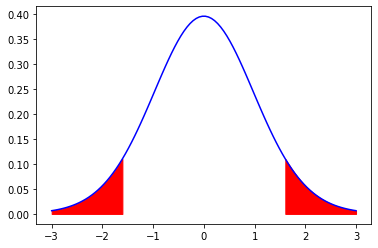

In [86]:
my_t = t(pop_size) # 传入参数为自由度，这里自由度为50

p = plot(x, my_t.pdf(x), 'b-')
lower_x = x[x<= -abs(t_val)]
upper_x = x[x>= abs(t_val)]

p = fill_between(lower_x, my_t.pdf(lower_x), color='red')
p = fill_between(upper_x, my_t.pdf(upper_x), color='red')

# 曲线拟合

导入基础包：

In [87]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## 多项式拟合

导入线多项式拟合工具：

In [88]:
from numpy import polyfit, poly1d

产生数据：

In [94]:
x=np.linspace(-5,5,100)
y = 4*x+1.5
noise_y = y + np.random.randn(y.shape[-1]) * 2.5

In [96]:
y.shape[0]

100

画出数据：

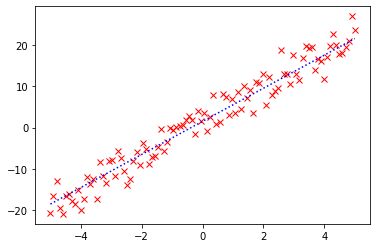

In [97]:
%matplotlib inline

p = plt.plot(x, noise_y, 'rx')
p = plt.plot(x, y, 'b:')

进行线性拟合，`polyfit` 是多项式拟合函数，线性拟合即一阶多项式：

In [99]:
coeff = polyfit(x,noise_y,1)
coeff

array([4.1594, 1.6626])

一阶多项式 $y = a_1 x + a_0$ 拟合，返回两个系数 $[a_1, a_0]$。

画出拟合曲线：

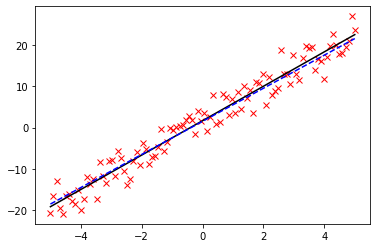

In [100]:
p = plt.plot(x, noise_y, 'rx')
p = plt.plot(x, coeff[0] * x + coeff[1], 'k-')
p = plt.plot(x, y, 'b--')

还可以用 `poly1d` 生成一个以传入的 `coeff` 为参数的多项式函数：

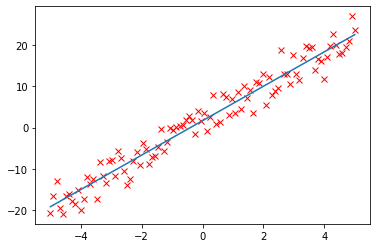

In [101]:
f = poly1d(coeff)
p = plt.plot(x, noise_y, 'rx')
p = plt.plot(x, f(x))

In [102]:
f

poly1d([4.1594, 1.6626])

显示`f`：

In [104]:
print(f)

 
4.159 x + 1.663


还可以对它进行数学操作生成新的多项式：

In [105]:
print (f + 2 * f ** 2)

      2
34.6 x + 31.82 x + 7.191


## 多项式拟合正弦函数

正弦函数：

In [106]:
x = np.linspace(-np.pi,np.pi,100)
y = np.sin(x)

用一阶到九阶多项式拟合，类似泰勒展开：

In [107]:
y1 = poly1d(polyfit(x,y,1))
y3 = poly1d(polyfit(x,y,3))
y5 = poly1d(polyfit(x,y,5))
y7 = poly1d(polyfit(x,y,7))
y9 = poly1d(polyfit(x,y,9))

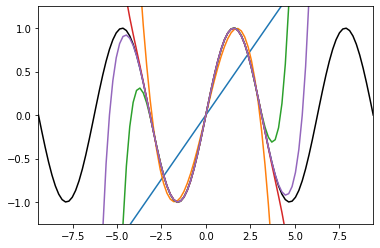

In [108]:
x = np.linspace(-3 * np.pi,3 * np.pi,100)

p = plt.plot(x, np.sin(x), 'k')
p = plt.plot(x, y1(x))
p = plt.plot(x, y3(x))
p = plt.plot(x, y5(x))
p = plt.plot(x, y7(x))
p = plt.plot(x, y9(x))

a = plt.axis([-3 * np.pi, 3 * np.pi, -1.25, 1.25])

黑色为原始的图形，可以看到，随着多项式拟合的阶数的增加，曲线与拟合数据的吻合程度在逐渐增大。

## 最小二乘拟合

In [109]:
# 导入相关的模块：
from scipy.linalg import lstsq
from scipy.stats import linregress

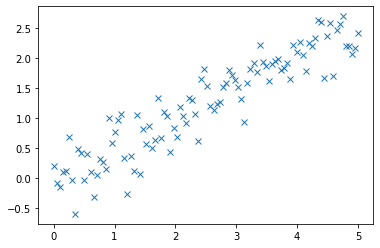

In [110]:
x = np.linspace(0,5,100)
y = 0.5 * x + np.random.randn(x.shape[-1]) * 0.35

plt.plot(x,y,'x')

一般来书，当我们使用一个 N-1 阶的多项式拟合这 M 个点时，有这样的关系存在：

$$XC = Y$$

即

$$\left[ \begin{matrix}
x_0^{N-1} & \dots & x_0 & 1 \\\
x_1^{N-1} & \dots & x_1 & 1 \\\
\dots & \dots & \dots & \dots \\\
x_M^{N-1} & \dots & x_M & 1
\end{matrix}\right] 
\left[ \begin{matrix} C_{N-1} \\\ \dots \\\ C_1 \\\ C_0 \end{matrix} \right] =
\left[ \begin{matrix} y_0 \\\ y_1 \\\ \dots \\\ y_M \end{matrix} \right]$$

### Scipy.linalg.lstsq 最小二乘解

要得到 `C` ，可以使用 `scipy.linalg.lstsq` 求最小二乘解。

这里，我们使用 1 阶多项式即 `N = 2`，先将 `x` 扩展成 `X`：

In [112]:
X = np.hstack((x[:,np.newaxis], np.ones((x.shape[-1],1))))
X[1:5]

array([[0.0505, 1.    ],
       [0.101 , 1.    ],
       [0.1515, 1.    ],
       [0.202 , 1.    ]])

求解:

In [113]:
C, resid, rank, s = lstsq(X, y)
C, resid, rank, s

(array([ 0.5224, -0.0622]), 9.716478918290926, 2, array([30.2373,  4.8215]))

画图：

sum squared residual = 9.716
rank of the X matrix = 2
singular values of X = [30.2373  4.8215]


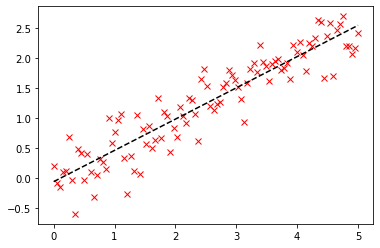

In [114]:
p = plt.plot(x, y, 'rx')
p = plt.plot(x, C[0] * x + C[1], 'k--')
print ("sum squared residual = {:.3f}".format(resid))
print ("rank of the X matrix = {}".format(rank))
print ("singular values of X = {}".format(s))

### Scipy.stats.linregress 线性回归

对于上面的问题，还可以使用线性回归进行求解：

In [115]:
slope, intercept, r_value, p_value, stderr = linregress(x, y)
slope, intercept

(0.5223594382812895, -0.062205545756081726)

R-value = 0.925
p-value (probability there is no correlation) = 4.206e-43
Root mean squared error of the fit = 0.147


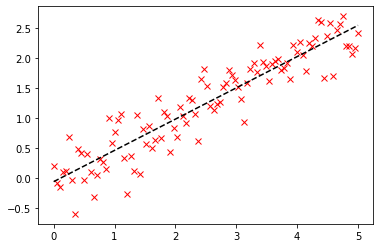

In [116]:
p = plt.plot(x, y, 'rx')
p = plt.plot(x, slope * x + intercept, 'k--')
print ("R-value = {:.3f}".format(r_value))
print ("p-value (probability there is no correlation) = {:.3e}".format(p_value))
print ("Root mean squared error of the fit = {:.3f}".format(np.sqrt(stderr)))

可以看到，两者求解的结果是一致的，但是出发的角度是不同的。

## 更高级的拟合

In [117]:
from scipy.optimize import leastsq

先定义这个非线性函数：$y = a e^{-b sin( f x + \phi)}$

In [118]:
def function(x, a , b, f, phi):
    """a function of x with four parameters"""
    result = a * np.exp(-b * np.sin(f * x + phi))
    return result

画出原始曲线：

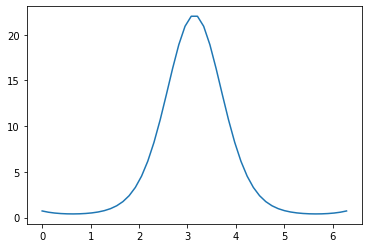

In [119]:
x = np.linspace(0, 2 * np.pi, 50)
actual_parameters = [3, 2, 1.25, np.pi / 4]
y = function(x, *actual_parameters)
p = plt.plot(x,y)

加入噪声：

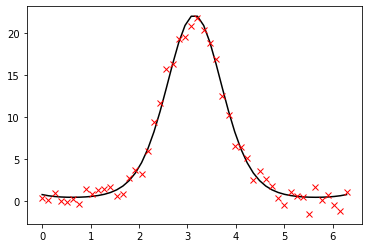

In [120]:
from scipy.stats import norm
y_noisy = y + 0.8 * norm.rvs(size=len(x))
p = plt.plot(x, y, 'k-')
p = plt.plot(x, y_noisy, 'rx')

### Scipy.optimize.leastsq

参考：https://blog.csdn.net/sinat_34328764/article/details/85473276

定义误差函数，将要优化的参数放在前面：

In [121]:
def f_err(p, y, x):
    return y - function(x, *p)

将这个函数作为参数传入 `leastsq` 函数，第二个参数为初始值：

In [122]:
c, ret_val = leastsq(f_err, [1, 1, 1, 1], args=(y_noisy, x))
c, ret_val

(array([2.0288, 2.3686, 1.1104, 1.2459]), 1)

`ret_val` 是 1~4 时，表示成功找到最小二乘解：

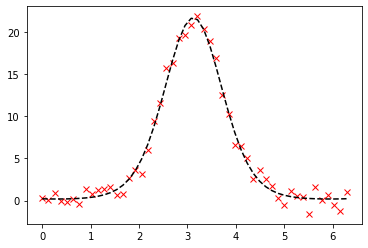

In [124]:
p = plt.plot(x, y_noisy, 'rx')
p = plt.plot(x, function(x, *c), 'k--')

### Scipy.optimize.curve_fit

更高级的做法：

In [126]:
from scipy.optimize import curve_fit

不需要定义误差函数，直接传入 `function` 作为参数：

In [127]:
p_est, err_est = curve_fit(function, x, y_noisy)

[2.0288 2.3686 1.1104 1.2459]


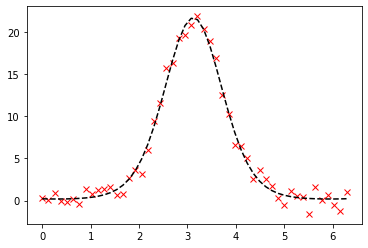

In [128]:
print( p_est)
p = plt.plot(x, y_noisy, "rx")
p = plt.plot(x, function(x, *p_est), "k--")

这里第一个返回的是函数的参数，第二个返回值为各个参数的协方差矩阵：

In [129]:
print (err_est)

[[ 0.809  -0.395   0.1068 -0.3336]
 [-0.395   0.1932 -0.052   0.1624]
 [ 0.1068 -0.052   0.0145 -0.0454]
 [-0.3336  0.1624 -0.0454  0.1418]]


协方差矩阵的对角线为各个参数的方差：

In [130]:
print ("normalized relative errors for each parameter")
print ("   a\t  b\t f\tphi")
print (np.sqrt(err_est.diagonal()) / p_est)

normalized relative errors for each parameter
   a	  b	 f	phi
[0.4433 0.1856 0.1086 0.3023]


# 最小化函数

## minimize 函数

In [131]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)

已知斜抛运动的水平飞行距离公式：

$d = 2 \frac{v_0^2}{g} \sin(\theta) \cos (\theta)$

- $d$ 水平飞行距离
- $v_0$ 初速度大小
- $g$ 重力加速度
- $\theta$ 抛出角度

希望找到使 $d$ 最大的角度 $\theta$。

定义距离函数：

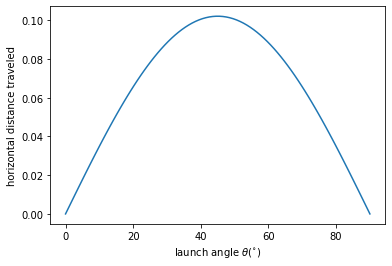

In [132]:
def dist(theta, v0):
    """calculate the distance travelled by a projectile launched
    at theta degrees with v0 (m/s) initial velocity.
    """
    g = 9.8
    theta_rad = pi * theta / 180
    return 2 * v0 ** 2 / g * sin(theta_rad) * cos(theta_rad)
theta = np.linspace(0,90,90)
p = plot(theta, dist(theta, 1.))
xl = xlabel(r'launch angle $\theta (^{\circ})$')
yl = ylabel('horizontal distance traveled')

因为 `Scipy` 提供的是最小化方法，所以最大化距离就相当于最小化距离的负数：

In [133]:
def neg_dist(theta, v0):
    return -1 * dist(theta, v0)

导入 `scipy.optimize.minimize`：

In [134]:
from scipy.optimize import minimize
result = minimize(neg_dist, 40, args=(1,))
print ("optimal angle = {:.1f} degrees".format(result.x[0]))

optimal angle = 45.0 degrees


`minimize` 接受三个参数：第一个是要优化的函数，第二个是初始猜测值，第三个则是优化函数的附加参数，默认 `minimize` 将优化函数的第一个参数作为优化变量，所以第三个参数输入的附加参数从优化函数的第二个参数开始。

查看返回结果：

In [135]:
print (result)

      fun: -0.10204080670440296
 hess_inv: array([[8095.267]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 3
     njev: 9
   status: 0
  success: True
        x: array([45.012])


## 优化方法

### BFGS 算法

`minimize` 函数默认根据问题是否有界或者有约束，确定参数 `method`使用 `'BFGS', 'L-BFGS-B', 'SLSQP'` 中的一种。

可以查看帮助来得到更多的信息：

In [139]:
# np.info(minimize)

默认没有约束时，使用的是BFGS 方法。

# 积分

## 符号积分

积分与求导的关系：

$$\frac{d}{dx} F(x) = f(x)
\Rightarrow F(x) = \int f(x) dx$$

符号运算可以用 `sympy` 模块完成。

先导入 `init_printing` 模块方便其显示：

In [142]:
from sympy import init_printing
init_printing()

from sympy import symbols, integrate
import sympy

产生 x 和 y 两个符号变量，并进行运算：

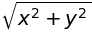

In [143]:
x, y = symbols('x y')
sympy.sqrt(x ** 2 + y ** 2)

对于生成的符号变量 `z`，我们将其中的 `x` 利用 `subs` 方法替换为 `3`：

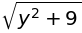

In [144]:
z = sympy.sqrt(x ** 2 + y ** 2)
z.subs(x, 3)

再替换 `y`：

In [145]:
z.subs(x, 3).subs(y, 4)

还可以从 `sympy.abc` 中导入现成的符号变量：

In [146]:
from sympy.abc import theta
y = sympy.sin(theta) ** 2
y

对 y 进行积分：

In [147]:
Y = integrate(y)
Y

计算 $Y(\pi) - Y(0)$：

In [148]:
import numpy as np
np.set_printoptions(precision=3)

Y.subs(theta, np.pi) - Y.subs(theta, 0)

计算 $\int_0^\pi y d\theta$ ：

In [149]:
integrate(y,(theta,0,sympy.pi))

显示的是字符表达式，查看具体数值可以使用 `evalf()` 方法，或者传入 `numpy.pi`，而不是 `sympy.pi` ：

In [150]:
integrate(y,(theta,0,sympy.pi)).evalf()

In [151]:
integrate(y,(theta,0,np.pi))

根据牛顿莱布尼兹公式，这两个数值应该相等。

产生不定积分对象：

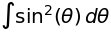

In [152]:
Y_indef = sympy.Integral(y)
Y_indef

In [153]:
print (type(Y_indef))

<class 'sympy.integrals.integrals.Integral'>


定积分

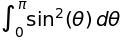

In [154]:
Y_def = sympy.Integral(y, (theta, 0, sympy.pi))
Y_def

产生函数 $Y(x) = \int_0^x sin^2(\theta) d\theta$，并将其向量化：

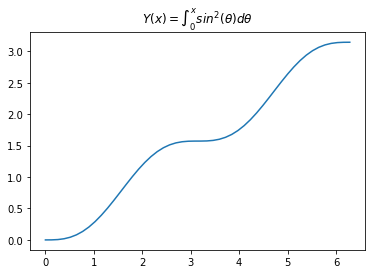

In [155]:
Y_raw = lambda x: integrate(y, (theta, 0, x))
Y = np.vectorize(Y_raw)

%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
p = plt.plot(x, Y(x))
t = plt.title(r'$Y(x) = \int_0^x sin^2(\theta) d\theta$')

## 数值积分

数值积分：

$$F(x) = \lim_{n \rightarrow \infty} \sum_{i=0}^{n-1} f(x_i)(x_{i+1}-x_i) 
\Rightarrow F(x) = \int_{x_0}^{x_n} f(x) dx$$

导入贝塞尔函数：

导入贝塞尔函数：

In [156]:
from scipy.special import jv

In [157]:
def f(x):
    return jv(2.5, x)

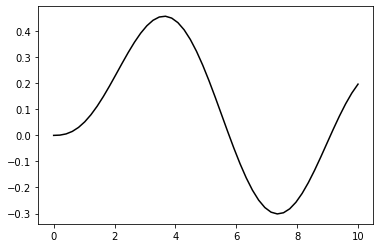

In [158]:
x = np.linspace(0, 10)
p = plt.plot(x, f(x), 'k-')

### `quad` 函数

Quadrature 积分的原理参见：

http://en.wikipedia.org/wiki/Numerical_integration#Quadrature_rules_based_on_interpolating_functions

quad 返回一个 (积分值，误差) 组成的元组：

In [160]:
from scipy.integrate import quad
interval = [0, 6.5]
value, max_err = quad(f, *interval)

print(value) #积分值
print (max_err) # 最大误差

1.2847429723410955
2.3418185139578114e-09


积分区间图示，蓝色为正，红色为负：

integral = 1.284742972
upper bound on error: 2.34e-09


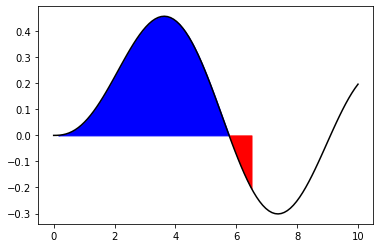

In [161]:
print ("integral = {:.9f}".format(value))
print ("upper bound on error: {:.2e}".format(max_err))
x = np.linspace(0, 10, 100)
p = plt.plot(x, f(x), 'k-')
x = np.linspace(0, 6.5, 45)
p = plt.fill_between(x, f(x), where=f(x)>0, color="blue")
p = plt.fill_between(x, f(x), where=f(x)<0, color="red", interpolate=True)

### 积分到无穷

In [162]:
from numpy import inf
interval = [0., inf]

def g(x):
    return np.exp(-x ** 1/2)

upper bound on error: 7.2e-11


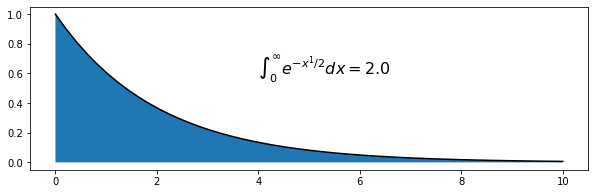

In [163]:
value, max_err = quad(g, *interval)
x = np.linspace(0, 10, 50)
fig = plt.figure(figsize=(10,3))
p = plt.plot(x, g(x), 'k-')
p = plt.fill_between(x, g(x))
plt.annotate(r"$\int_0^{\infty}e^{-x^1/2}dx = $" + "{}".format(value), (4, 0.6),
         fontsize=16)
print ("upper bound on error: {:.1e}".format(max_err))

### 双重积分

假设我们要进行如下的积分：

$$ I_n = \int \limits_0^{\infty} \int \limits_1^{\infty} \frac{e^{-xt}}{t^n}dt dx = \frac{1}{n}$$

In [164]:
def h(x, t, n):
    """core function, takes x, t, n"""
    return np.exp(-x * t) / (t ** n)

一种方式是调用两次 `quad` 函数，不过这里 `quad` 的返回值不能向量化，所以使用了修饰符 `vectorize` 将其向量化：

In [165]:
from numpy import vectorize
@vectorize
def int_h_dx(t, n):
    """Time integrand of h(x)."""
    return quad(h, 0, np.inf, args=(t, n))[0]

In [167]:
@vectorize
def I_n(n):
    return quad(int_h_dx, 1, np.inf, args=(n))

In [168]:
I_n([0.5, 1.0, 2.0, 5])

(array([2. , 1. , 0.5, 0.2]), array([0., 0., 0., 0.]))

或者直接调用 `dblquad` 函数，并将积分参数传入，传入方式有多种，后传入的先进行积分：

In [169]:
from scipy.integrate import dblquad
@vectorize
def I(n):
    """Same as I_n, but using the built-in dblquad"""
    x_lower = 0
    x_upper = np.inf
    return dblquad(h,
                   lambda t_lower: 1, lambda t_upper: np.inf,
                   x_lower, x_upper, args=(n,))

In [170]:
I_n([0.5, 1.0, 2.0, 5])

(array([2. , 1. , 0.5, 0.2]), array([0., 0., 0., 0.]))

## 采样点积分

### trapz 方法 和 simps 方法

In [172]:
from scipy.integrate import trapz, simps

`sin` 函数， `100` 个采样点和 `5` 个采样点：

In [173]:
x_s = np.linspace(0, np.pi, 5)
y_s = np.sin(x_s)
x = np.linspace(0, np.pi, 100)
y = np.sin(x)

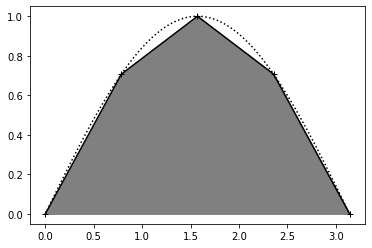

In [174]:
p = plt.plot(x, y, 'k:')
p = plt.plot(x_s, y_s, 'k+-')
p = plt.fill_between(x_s, y_s, color="gray")

采用 [trapezoidal 方法](https://en.wikipedia.org/wiki/Trapezoidal_rule) 和 [simpson 方法](https://en.wikipedia.org/wiki/Simpson%27s_rule) 对这些采样点进行积分（函数积分为 2）：

In [175]:
result_s = trapz(y_s, x_s)
result_s_s = simps(y_s, x_s)
result = trapz(y, x)
print ("Trapezoidal Integration over 5 points : {:.3f}".format(result_s))
print ("Simpson Integration over 5 points : {:.3f}".format(result_s_s))
print ("Trapezoidal Integration over 100 points : {:.3f}".format(result))

Trapezoidal Integration over 5 points : 1.896
Simpson Integration over 5 points : 2.005
Trapezoidal Integration over 100 points : 2.000


### 使用 ufunc 进行积分

`Numpy` 中有很多 `ufunc` 对象：

In [176]:
type(np.add)

numpy.ufunc

In [177]:
# np.info(np.add.accumulate)

In [190]:
# from pandas import DataFrame
# np.info(DataFrame.groupby)

`np.add.accumulate` 相当于 `cumsum` ：

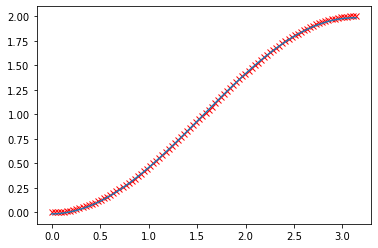

In [191]:
result_np = np.add.accumulate(y) * (x[1] - x[0]) - (x[1] - x[0]) / 2
p = plt.plot(x, - np.cos(x) + np.cos(0), 'rx')
p = plt.plot(x, result_np)

# 解微分方程

## 积分求解

### 简单的例子

$$\frac{dy}{dt} = sin(t)$$

In [199]:
def dy_dt(y, t):
    return np.sin(t)

积分求解：

In [201]:
from scipy.integrate import odeint

t = np.linspace(0, 2*pi, 100)

result = odeint(dy_dt, 0, t)

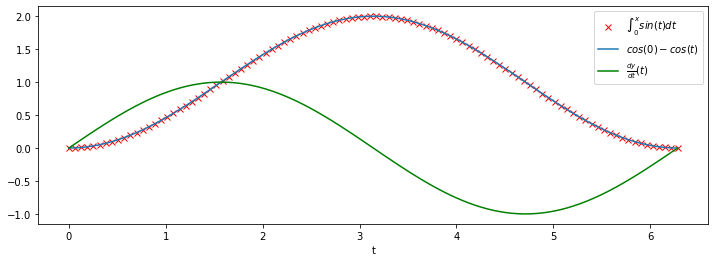

In [203]:
resfig = figure(figsize=(12,4))
p = plot(t, result, "rx", label=r"$\int_{0}^{x}sin(t) dt $")
p = plot(t, -cos(t) + cos(0), label=r"$cos(0) - cos(t)$")
p = plot(t, dy_dt(0, t), "g-", label=r"$\frac{dy}{dt}(t)$")
l = legend(loc="upper right")
xl = xlabel("t")

### 高阶微分方程

抛物运动（竖直方向）：

$$
\frac{d^2x}{dt^2} = g - \frac{D}{m}\frac{dx}{dt}
$$

改写成如下形式：

$$y = \left[x, \frac{dx}{dt}\right] $$

$$\begin{aligned}
\frac{dy_0}{dt} &= y_1 \\\
\frac{dy_1}{dt} &= -g - \frac{D}{m} y_1 \\\
\end{aligned}
$$

In [204]:
def dy_dt(y, t):
    """Governing equations for projectile motion with drag.
    y[0] = position
    y[1] = velocity
    g = gravity (m/s2)
    D = drag (1/s) = force/velocity
    m = mass (kg)
    """
    g = -9.8
    D = 0.1
    m = 0.15
    dy1 = g - (D/m) * y[1]
    dy0 = y[1] if y[0] >= 0 else 0.
    return [dy0, dy1]

In [205]:
position_0 = 0.
velocity_0 = 100
t = linspace(0, 12, 100)
y = odeint(dy_dt, [position_0, velocity_0], t)

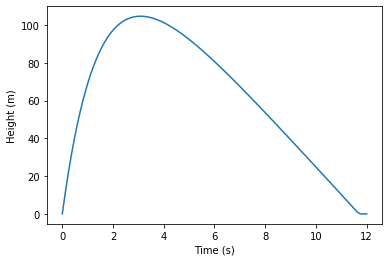

In [206]:
p = plot(t, y[:,0])
yl = ylabel("Height (m)")
xl = xlabel("Time (s)")

In [208]:
y, infodict = odeint(dy_dt, [position_0, velocity_0], t, full_output=True, printmessg=True, )
print (sorted(infodict.keys()))
print ("cumulative number of function evaluations at each calculated point:", infodict['nfe'])
print ("cumulative number of time steps", infodict['nst'])

['hu', 'imxer', 'leniw', 'lenrw', 'message', 'mused', 'nfe', 'nje', 'nqu', 'nst', 'tcur', 'tolsf', 'tsw']
cumulative number of function evaluations at each calculated point: [ 45  49  51  53  55  59  61  61  63  65  67  67  69  71  73  73  75  77
  77  79  79  81  81  83  85  85  87  87  89  89  91  91  93  95  95  97
  97  99  99 101 101 103 103 105 107 107 109 109 111 111 113 113 115 115
 117 117 119 119 121 121 123 123 123 125 125 127 127 129 129 131 131 131
 133 133 135 135 135 137 137 139 139 139 141 141 143 143 143 145 145 147
 147 149 149 149 154 158 283 289 289]
cumulative number of time steps [ 20  22  23  24  25  27  28  28  29  30  31  31  32  33  34  34  35  36
  36  37  37  38  38  39  40  40  41  41  42  42  43  43  44  45  45  46
  46  47  47  48  48  49  49  50  51  51  52  52  53  53  54  54  55  55
  56  56  57  57  58  58  59  59  59  60  60  61  61  62  62  63  63  63
  64  64  65  65  65  66  66  67  67  67  68  68  69  69  69  70  70  71
  71  72  72  72  73  75 1

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\scipy\integrate\odepack.py:250: ODEintWarning: Integration successful.
  warnings.warn(warning_msg, ODEintWarning)


# 稀疏矩阵

`Scipy` 提供了稀疏矩阵的支持（`scipy.sparse`）。

稀疏矩阵主要使用 位置 + 值 的方法来存储矩阵的非零元素，根据存储和使用方式的不同，有如下几种类型的稀疏矩阵：

类型|描述
---|----
`bsr_matrix(arg1[, shape, dtype, copy, blocksize])`	| Block Sparse Row matrix
`coo_matrix(arg1[, shape, dtype, copy])`	| A sparse matrix in COOrdinate format.
`csc_matrix(arg1[, shape, dtype, copy])`	| Compressed Sparse Column matrix
`csr_matrix(arg1[, shape, dtype, copy])`	| Compressed Sparse Row matrix
`dia_matrix(arg1[, shape, dtype, copy])`	| Sparse matrix with DIAgonal storage
`dok_matrix(arg1[, shape, dtype, copy])`	| Dictionary Of Keys based sparse matrix.
`lil_matrix(arg1[, shape, dtype, copy])`	| Row-based linked list sparse matrix

在这些存储格式中：

- COO 格式在构建矩阵时比较高效
- CSC 和 CSR 格式在乘法计算时比较高效

## 构建稀疏矩阵

In [210]:
from scipy.sparse import *
import numpy as np

创建一个空的稀疏矩阵：

In [211]:
coo_matrix((2,3))

<2x3 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in COOrdinate format>

也可以使用一个已有的矩阵或数组或列表中创建新矩阵：

In [213]:
A = coo_matrix([[1,2,0],[0,0,3],[4,0,5]])
print(A)

  (0, 0)	1
  (0, 1)	2
  (1, 2)	3
  (2, 0)	4
  (2, 2)	5


不同格式的稀疏矩阵可以相互转化：

In [214]:
print(type(A))
B = A.tocsr()
print(type(B))

<class 'scipy.sparse.coo.coo_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>


可以转化为普通矩阵：

In [215]:
C = A.todense()
C

matrix([[1, 2, 0],
        [0, 0, 3],
        [4, 0, 5]])

与向量的乘法：

In [216]:
v = np.array([1,0,-1])
A.dot(v)

array([ 1, -3, -1], dtype=int32)

还可以传入一个 `(data, (row, col))` 的元组来构建稀疏矩阵：

In [217]:
I = np.array([0,3,1,0])
J = np.array([0,3,1,2])
V = np.array([4,5,7,9])
A = coo_matrix((V,(I,J)),shape=(4,4))

In [218]:
print (A)

  (0, 0)	4
  (3, 3)	5
  (1, 1)	7
  (0, 2)	9


COO 格式的稀疏矩阵在构建的时候只是简单的将坐标和值加到后面，对于重复的坐标不进行处理：

In [219]:
I = np.array([0,0,1,3,1,0,0])
J = np.array([0,2,1,3,1,0,0])
V = np.array([1,1,1,1,1,1,1])
B = coo_matrix((V,(I,J)),shape=(4,4))
print (B)

  (0, 0)	1
  (0, 2)	1
  (1, 1)	1
  (3, 3)	1
  (1, 1)	1
  (0, 0)	1
  (0, 0)	1


转换成 CSR 格式会自动将相同坐标的值合并：

In [221]:
C = B.tocsr()
print(C)

  (0, 0)	3
  (0, 2)	1
  (1, 1)	2
  (3, 3)	1


## 求解微分方程

In [222]:
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve
from numpy.linalg import solve, norm
from numpy.random import rand

构建 `1000 x 1000` 的稀疏矩阵：

In [223]:
A = lil_matrix((1000, 1000))
A[0, :100] = rand(100)
A[1, 100:200] = A[0, :100]
A.setdiag(rand(1000))

转化为 CSR 之后，用 `spsolve` 求解 $Ax=b$：

In [224]:
A = A.tocsr()
b = rand(1000)
x = spsolve(A, b)

转化成正常数组之后求解并查看误差：

In [225]:
x_ = solve(A.toarray(), b)
err = norm(x-x_)
err

## sparse.find 函数

返回一个三元组，表示稀疏矩阵中非零元素的 `(row, col, value)`：

In [226]:
from scipy import sparse

row, col, val = sparse.find(C)
print (row, col, val)

[0 1 0 3] [0 1 2 3] [3 2 1 1]


## sparse.issparse 函数

查看一个对象是否为稀疏矩阵

In [227]:
sparse.issparse(B)

True

或者

In [228]:
sparse.isspmatrix(B.todense())

False

还可以查询是否为指定格式的稀疏矩阵：

In [229]:
print(sparse.isspmatrix_coo(B),'\n',sparse.isspmatrix_csr(B))

True 
 False


对于稀疏矩阵来说，其线性代数操作可以使用 `scipy.sparse.linalg` 实现：

In [230]:
import scipy.sparse.linalg